In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import os
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
import matplotlib.font_manager as fm
fm.fontManager.ttflist = fm.FontManager().ttflist
print(pd.__version__)
print(sklearn.__version__)
print(statsmodels.__version__)

1.4.2
1.0.2
0.13.2


In [2]:

[i.name for i in fm.fontManager.ttflist if 'Nanum' in i.fname][:5]

['NanumBarunGothic',
 'NanumMyeongjo Eco',
 'NanumBarunGothic',
 'NanumMyeongjo',
 'NanumGothic Eco']

In [3]:
temper = os.listdir('data')[1]
temp = pd.read_csv('data/'+temper,index_col=0, parse_dates=True)
temp

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


In [11]:
temp.index

Int64Index([  1,   2,   3,   3,   4,   5,   6,   6,   6,   7,
            ...
            714, 715, 716, 717, 718, 719, 719, 720, 720, 721],
           dtype='int64', name='#', length=800)

In [10]:
stock = os.listdir('data')[4]
stock = pd.read_csv('data/'+stock,index_col=0, parse_dates=True)
stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-28,83200.0,83200.0,82100.0,82100.0,80985.664063,15596759
2021-04-29,82400.0,82500.0,81500.0,81700.0,80591.093750,20000973
2021-04-30,81900.0,82100.0,81500.0,81500.0,80393.812500,18673197
2021-05-03,81000.0,82400.0,81000.0,81700.0,80591.093750,15710336
2021-05-04,81900.0,82600.0,81800.0,82600.0,81478.882813,12532550
...,...,...,...,...,...,...
2022-04-22,67200.0,67300.0,66700.0,67000.0,67000.000000,11791478
2022-04-25,66500.0,66700.0,66300.0,66300.0,66300.000000,11016474
2022-04-26,66400.0,66700.0,66100.0,66100.0,66100.000000,12946923


In [12]:
price = stock['Close']
price

Date
2021-04-28    82100.0
2021-04-29    81700.0
2021-04-30    81500.0
2021-05-03    81700.0
2021-05-04    82600.0
               ...   
2022-04-22    67000.0
2022-04-25    66300.0
2022-04-26    66100.0
2022-04-27    65000.0
2022-04-28    64700.0
Name: Close, Length: 247, dtype: float64

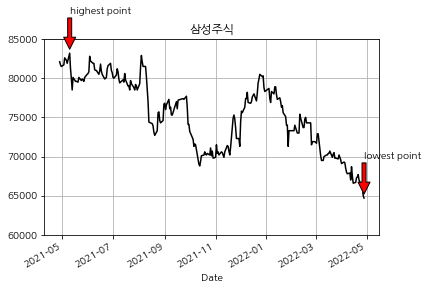

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
price.plot(ax=ax, style='black',)
plt.ylim([60000,85000])
# plt.xlim([])
plt.grid()
minmax = [(price.argmin(),'lowest point'),(price.argmax(),'highest point')]
for d, label in minmax:
    ax.annotate(label, xy=(price.index[d],price[d]+500), xytext=(price.index[d],price[d]+5000), arrowprops=dict(facecolor='red'))
ax.set_title('삼성주식')
plt.show()

In [10]:
print(price.argmax(),price.argmin(),price[price.argmax()], price[price.argmin()])

7 246 83200.0 64700.0


In [ ]:
# np.corrcoef([데이터들 arrays], 비교할 데이터 array)

In [11]:
from datetime import datetime
datetime(2022,4,30).timestamp()

1651244400.0

In [12]:
help(price.asof)

Help on method asof in module pandas.core.generic:

asof(where, subset=None) method of pandas.core.series.Series instance
    Return the last row(s) without any NaNs before `where`.
    
    The last row (for each element in `where`, if list) without any
    NaN is taken.
    In case of a :class:`~pandas.DataFrame`, the last row without NaN
    considering only the subset of columns (if not `None`)
    
    If there is no good value, NaN is returned for a Series or
    a Series of NaN values for a DataFrame
    
    Parameters
    ----------
    where : date or array-like of dates
        Date(s) before which the last row(s) are returned.
    subset : str or array-like of str, default `None`
        For DataFrame, if not `None`, only use these columns to
        check for NaNs.
    
    Returns
    -------
    scalar, Series, or DataFrame
    
        The return can be:
    
        * scalar : when `self` is a Series and `where` is a scalar
        * Series: when `self` is a Series and

In [13]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('슝=3')

슝=3


In [26]:
from math import log10
augmented_dickey_fuller_test(price)

Results of Dickey-Fuller Test:
Test Statistic                  -1.042371
p-value                          0.737499
#Lags Used                       0.000000
Number of Observations Used    246.000000
Critical Value (1%)             -3.457215
Critical Value (5%)             -2.873362
Critical Value (10%)            -2.573070
dtype: float64


In [14]:
from sklearn.model_selection import GridSearchCV
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either est